In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
from sklearn.cluster import KMeans

rowsToCluster = pd.DataFrame()
startRampPath = 'data/BLM/start_ramp'

In [2]:
def getRowWithBlmMax(blmData):
    """
    Parameters
        blmData : DataFrame -- DataFrame loaded from the BLM data file, without timestamp column
    Returns
        DataFrame with row with the max BLM value in the provided data
    """
    
    blmMax = blmData.max() # Series of column num (i.e. BLM num) -> maximum value for that column
    blmMaxOverall = blmData.values.max() # max BLM value in the whole dataset
    rowIndexWithBlmMaxOverall = blmData.idxmax()[blmMax[blmMax == blmMaxOverall].index]
    rowWithBlmMaxOverall = blmData.loc[rowIndexWithBlmMaxOverall]
    
    assert rowWithBlmMaxOverall.max().max() == blmMaxOverall
    #TODO what if more than one row contains the same blmMaxOverall?
    assert len(rowWithBlmMaxOverall.index) == 1
    
    return rowWithBlmMaxOverall

In [3]:
for file in os.listdir(startRampPath):
    # load BLM data file as a DataFrame
    blmData = pd.read_csv(startRampPath + '/' + file, sep=' ', header=None)
    
    # Delete first column (contains timestamps)
    blmData = blmData.drop(columns=0)
    
    rowsToCluster = rowsToCluster.append(getRowWithBlmMax(blmData), ignore_index=True)

In [4]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(rowsToCluster)
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
blmLabels = np.genfromtxt('data/blm_labels.txt', dtype='str')
beam1BlmLabels = np.genfromtxt('data/beam1_blm_labels.txt', dtype='str')
beam2BlmLabels = np.genfromtxt('data/beam2_blm_labels.txt', dtype='str')

rowsToCluster.columns = blmLabels

# Extract out of rowsToCluster BLMs associated with beam 1, and BLMs associated with Beam 2

beam1BlmData = rowsToCluster.filter(items=beam1BlmLabels); 
beam2BlmData = rowsToCluster.filter(items=beam2BlmLabels);

beam2BlmData.columns = beam1BlmLabels; # so that Beam 1 and Beam 2 data can merge under the same 'logical' BLM labels
# NB - chose to use beam1BlmLabels arbitrarily - could have just as well used beam2.

mergedBlmData = pd.concat([beam1BlmData, beam2BlmData], keys=['B1', 'B2'])

In [6]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(mergedBlmData)
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0]


<IPython.core.display.Javascript object>


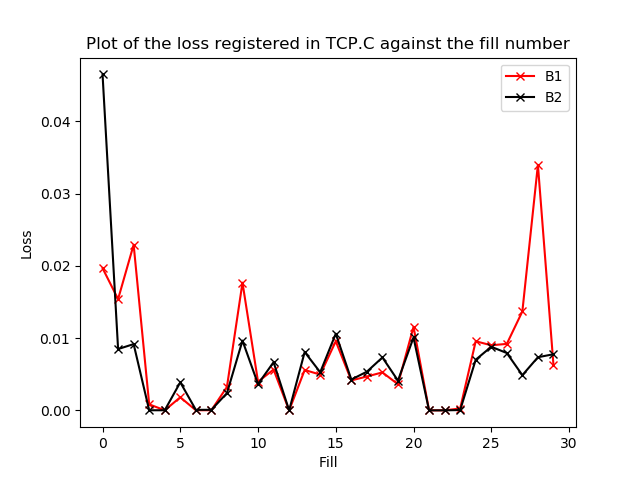

Text(0, 0.5, 'Loss')

In [7]:
# Data
df = pd.DataFrame({
    'B1': mergedBlmData.loc['B1']['BLMTI.06L7.B1E10_TCP.C6L7.B1'],
    'B2': mergedBlmData.loc['B2']['BLMTI.06L7.B1E10_TCP.C6L7.B1']
})
 
# multiple line plot
plt.figure()
plt.plot('B1', data=df, marker='x', color='red')
plt.plot('B2', data=df, marker='x', color='black')
plt.legend()
plt.title('Plot of the loss registered in TCP.C against the fill number')
plt.xlabel('Fill')
plt.ylabel('Loss')


<IPython.core.display.Javascript object>


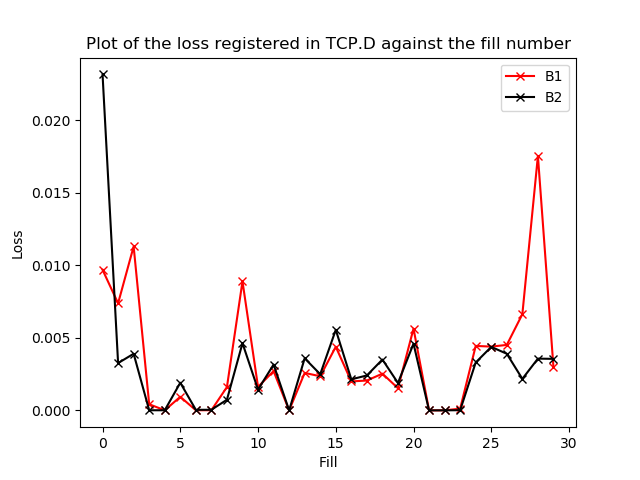

Text(0, 0.5, 'Loss')

In [8]:
# Data
df = pd.DataFrame({
    'B1': mergedBlmData.loc['B1']['BLMTI.06L7.B1E10_TCP.D6L7.B1'],
    'B2': mergedBlmData.loc['B2']['BLMTI.06L7.B1E10_TCP.D6L7.B1']
})

# multiple line plot
plt.figure()
plt.plot('B1', data=df, marker='x', color='red')
plt.plot('B2', data=df, marker='x', color='black')
plt.legend()
plt.title('Plot of the loss registered in TCP.D against the fill number')
plt.xlabel('Fill')
plt.ylabel('Loss')

<IPython.core.display.Javascript object>


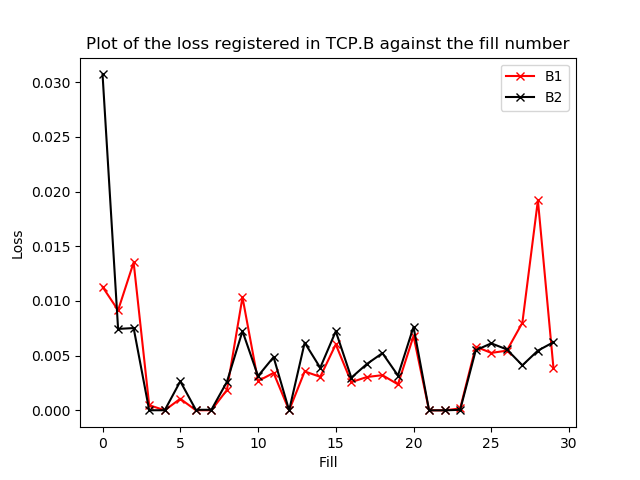

Text(0, 0.5, 'Loss')

In [9]:
# Data
df = pd.DataFrame({
    'B1': mergedBlmData.loc['B1']['BLMTI.06L7.B1E10_TCP.B6L7.B1'],
    'B2': mergedBlmData.loc['B2']['BLMTI.06L7.B1E10_TCP.B6L7.B1']
})
 
# multiple line plot
plt.figure()
plt.plot('B1', data=df, marker='x', color='red')
plt.plot('B2', data=df, marker='x', color='black')
plt.legend()
plt.title('Plot of the loss registered in TCP.B against the fill number')
plt.xlabel('Fill')
plt.ylabel('Loss')

<IPython.core.display.Javascript object>


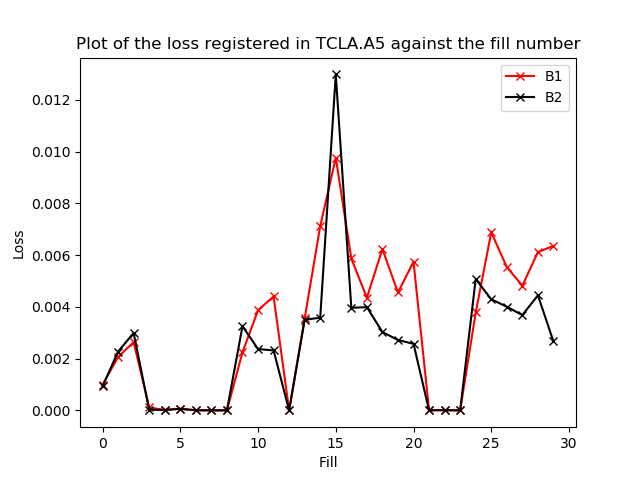

Text(0, 0.5, 'Loss')

In [10]:
# Data
df = pd.DataFrame({
    'B1': mergedBlmData.loc['B1']['BLMTI.05R3.B1I10_TCLA.A5R3.B1'],
    'B2': mergedBlmData.loc['B2']['BLMTI.05R3.B1I10_TCLA.A5R3.B1']
})
 
# multiple line plot
plt.figure()
plt.plot('B1', data=df, marker='x', color='red')
plt.plot('B2', data=df, marker='x', color='black')
plt.legend()
plt.title('Plot of the loss registered in TCLA.A5 against the fill number')
plt.xlabel('Fill')
plt.ylabel('Loss')

<IPython.core.display.Javascript object>


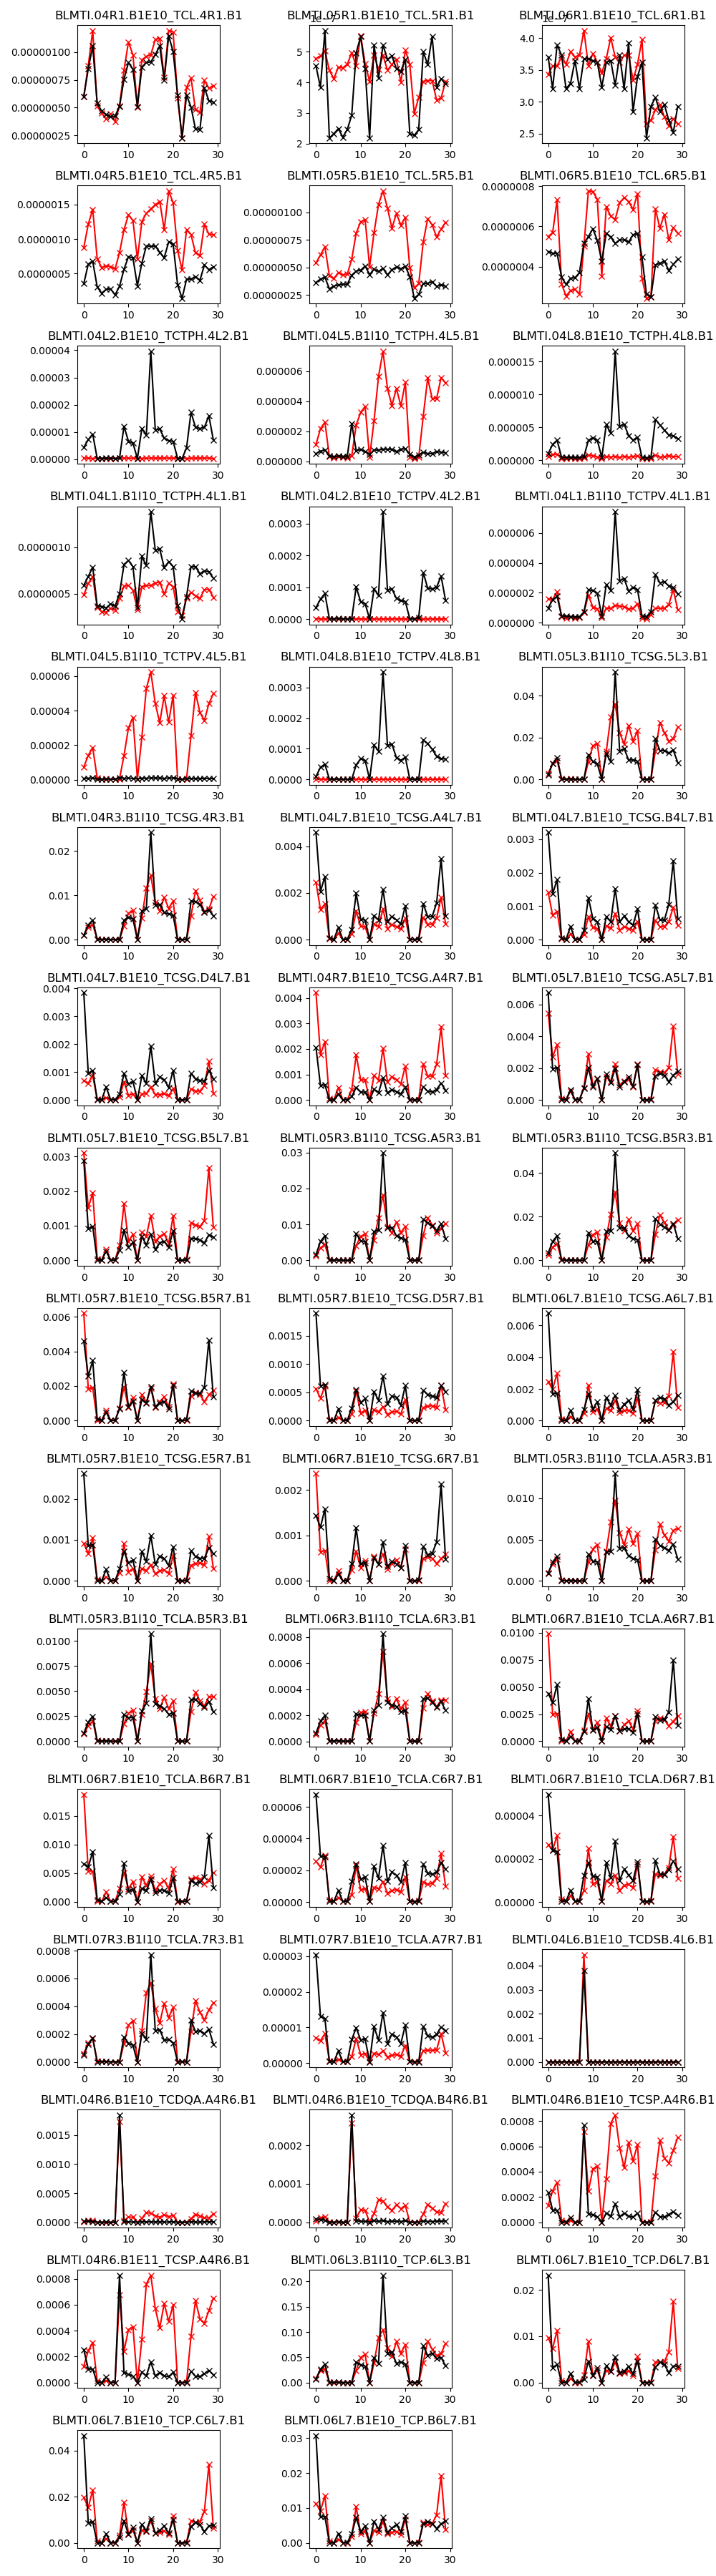

In [11]:
plt.figure(figsize=(10, 36))
ncols = 3;
nrows = math.ceil(mergedBlmData.shape[1] / ncols)
i = 1;

for column in mergedBlmData:
    # Data
    df = pd.DataFrame({
        'B1': mergedBlmData.loc['B1'][column],
        'B2': mergedBlmData.loc['B2'][column]
    })
 
    plt.subplot(nrows, ncols, i)
    plt.plot('B1', data=df, marker='x', color='red')
    plt.plot('B2', data=df, marker='x', color='black')
    plt.title(column)

    
    i = i + 1

plt.tight_layout()